# ML Challenge 
## Analysis of comments on Glassdoor

Hugo Fernando Abarca Jiménez.
ID: 323019027

Human resource needs

● Web Scraper Specialist

● Python developer

● Data Scientist

● MLOps

Stage 1 Will create a pipeline to extract Information of website Glassdoor

Web Scraping

This endpoint will receive as input Web scrapping:

- Open web page

- Read the content

- Extract content by globant

- Save all in a data frame

In [1]:
import requests
import bs4

In [164]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}



In [165]:
url='https://www.redditinc.com/blog/'

In [198]:
fecha_1=[]
anuncio_1=[]
red_social_1=[]

for page in range(1,35):
    pag='p'+str(page)
    page_url=url+pag
    res=requests.get(page_url,headers=headers)
    soup=bs4.BeautifulSoup(res.text,'lxml')
    
    for date in soup.select('.posted-on'):
        fechas_time = date.find('time',class_='entry-date published')
        
        for fecha in fechas_time:       
            fechas=fechas_time['datetime']
            fecha_1.append(fechas)
            

    
    for name in soup.select('.article-wrap'):
        h2=name.find('h2',class_='entry-title')
        anuncio_1.append(h2.text)
        a=name.find('div',class_='entry-share').find_all('a')
        social_media = [link['class'][0].split('-')[-1] for link in a]
        red_social_1.append(social_media)

In [199]:
print(len(fecha_1))
print(len(anuncio_1))
print(len(red_social_1))

338
338
338


In [205]:
import pandas as pd


data = {
    'Date': fecha_1,
    'Announcement': anuncio_1,
    'share-link': red_social_1
}

df = pd.DataFrame(data)


df

,Date,Announcement,share-link
0,2024-04-24T12:50:00-04:00,"A Faster, Conversation-First Approach to Feeds...","[facebook, twitter, pinterest, tumblr, reddit]"
1,2024-04-24T08:00:00-04:00,Expanding our Shopping Ecosystem: Introducing ...,"[facebook, twitter, pinterest, tumblr, reddit]"
2,2024-03-27T13:00:00-04:00,Building on Our Partnership With Cision,"[facebook, twitter, pinterest, tumblr, reddit]"
3,2024-03-21T13:45:00-04:00,Reddit is Now a Publicly Traded Company on the...,"[facebook, twitter, pinterest, tumblr, reddit]"
4,2024-03-15T10:40:00-04:00,Keeping Our Platform Safe,"[facebook, twitter, pinterest, tumblr, reddit]"
...,...,...,...
333,2017-01-23T00:00:00-05:00,The Rise and Rise of Wholesome Memes,"[facebook, twitter, pinterest, tumblr, reddit]"
334,2017-01-19T00:00:00-05:00,Spoiler Tags for Posts,"[facebook, twitter, pinterest, tumblr, reddit]"
335,2017-01-18T00:00:00-05:00,Redditors' Questions Return to A&E on Leah Rem...,"[facebook, twitter, pinterest, tumblr, reddit]"
336,2015-05-14T00:00:00-04:00,"Promote ideas, protect people","[facebook, twitter, tumblr, reddit]"


In [207]:
df.to_csv('Reddit-data.csv', index=False)

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('Reddit-data.csv')

In [4]:
data.head()

,Date,Announcement,share-link
0,2024-04-24T12:50:00-04:00,"A Faster, Conversation-First Approach to Feeds...","['facebook', 'twitter', 'pinterest', 'tumblr',..."
1,2024-04-24T08:00:00-04:00,Expanding our Shopping Ecosystem: Introducing ...,"['facebook', 'twitter', 'pinterest', 'tumblr',..."
2,2024-03-27T13:00:00-04:00,Building on Our Partnership With Cision,"['facebook', 'twitter', 'pinterest', 'tumblr',..."
3,2024-03-21T13:45:00-04:00,Reddit is Now a Publicly Traded Company on the...,"['facebook', 'twitter', 'pinterest', 'tumblr',..."
4,2024-03-15T10:40:00-04:00,Keeping Our Platform Safe,"['facebook', 'twitter', 'pinterest', 'tumblr',..."


In [3]:
datos=data.copy()
datos=datos.iloc[:,1:]
split=data['Date'].astype(str).str.split('T', expand=True)
datos['Date']=split.iloc[:,0]
hora=split[1].astype(str).str.split('-', expand=True)
datos['Time']=hora.iloc[:,0]
datos['UTC']=hora.iloc[:,1]
datos['time_zone']=np.where(datos['UTC'].str.contains('04:00'),'Hora Estándar del Atlántico','Hora Estándar del Este')

In [8]:
datos

,Announcement,share-link,Date,Time,UTC,time_zone
0,"A Faster, Conversation-First Approach to Feeds...","['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-04-24,12:50:00,04:00,Hora Estándar del Atlántico
1,Expanding our Shopping Ecosystem: Introducing ...,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-04-24,08:00:00,04:00,Hora Estándar del Atlántico
2,Building on Our Partnership With Cision,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-03-27,13:00:00,04:00,Hora Estándar del Atlántico
3,Reddit is Now a Publicly Traded Company on the...,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-03-21,13:45:00,04:00,Hora Estándar del Atlántico
4,Keeping Our Platform Safe,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-03-15,10:40:00,04:00,Hora Estándar del Atlántico
...,...,...,...,...,...,...
333,The Rise and Rise of Wholesome Memes,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2017-01-23,00:00:00,05:00,Hora Estándar del Este
334,Spoiler Tags for Posts,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2017-01-19,00:00:00,05:00,Hora Estándar del Este
335,Redditors' Questions Return to A&E on Leah Rem...,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2017-01-18,00:00:00,05:00,Hora Estándar del Este
336,"Promote ideas, protect people","['facebook', 'twitter', 'tumblr', 'reddit']",2015-05-14,00:00:00,04:00,Hora Estándar del Atlántico


# Stage 2 Will create a model to classifier and make a sentiment analysis

## Text Preprocessing

This endpoint will receive as input Web scrapping result in a data frame

- Create English-Spanish data frame

- Analyze Separately Spanish and English data frame (Corpus)

- Data cleaning

- Stop words.

- Lemmatization

- N-grmas Distributions

## Classification proposed

This endpoint will receive as input parameters of text preprocessing:

- Construction model

- End Date (date time)

- Taring model

- Calculation of grammatical probabilities

## Extraction of main features
- Classification
- Sentimental Analysis (pysentimiento vs vader)

In [4]:
en_es=datos.copy()

In [13]:
en_es.head(2)

,Announcement,share-link,Date,Time,UTC,time_zone
0,"A Faster, Conversation-First Approach to Feeds...","['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-04-24,12:50:00,04:00,Hora Estándar del Atlántico
1,Expanding our Shopping Ecosystem: Introducing ...,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-04-24,08:00:00,04:00,Hora Estándar del Atlántico


In [5]:
from langdetect import detect

Create English-Spanish data frame

In [6]:
def detector (text):
    try:
        leng=detect(text)
        return leng
    except:
        return None

In [7]:
en_es['Language']=en_es['Announcement'].apply(detector)

In [8]:
en_es['Language'].unique()

array(['en', 'ro', 'de', 'af', 'nl', 'pt', 'fr', 'es', 'da', 'vi', 'cy',
       'ca'], dtype=object)

In [9]:
en_es['English'] = en_es[en_es['Language'] == 'en']['Announcement']
en_es['Spanish'] = en_es[en_es['Language'] == 'es']['Announcement']
# en_es['Spanish'] = np.where(en_es['Language'] == 'es', 1, 0)
# en_es['English'] = np.where(en_es['Language'] == 'en', 1, 0)

In [17]:
en_es

,Announcement,share-link,Date,Time,UTC,time_zone,Language,English,Spanish
0,"A Faster, Conversation-First Approach to Feeds...","['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-04-24,12:50:00,04:00,Hora Estándar del Atlántico,en,"A Faster, Conversation-First Approach to Feeds...",NaN
1,Expanding our Shopping Ecosystem: Introducing ...,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-04-24,08:00:00,04:00,Hora Estándar del Atlántico,en,Expanding our Shopping Ecosystem: Introducing ...,NaN
2,Building on Our Partnership With Cision,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-03-27,13:00:00,04:00,Hora Estándar del Atlántico,en,Building on Our Partnership With Cision,NaN
3,Reddit is Now a Publicly Traded Company on the...,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-03-21,13:45:00,04:00,Hora Estándar del Atlántico,en,Reddit is Now a Publicly Traded Company on the...,NaN
4,Keeping Our Platform Safe,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-03-15,10:40:00,04:00,Hora Estándar del Atlántico,en,Keeping Our Platform Safe,NaN
...,...,...,...,...,...,...,...,...,...
333,The Rise and Rise of Wholesome Memes,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2017-01-23,00:00:00,05:00,Hora Estándar del Este,en,The Rise and Rise of Wholesome Memes,NaN
334,Spoiler Tags for Posts,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2017-01-19,00:00:00,05:00,Hora Estándar del Este,en,Spoiler Tags for Posts,NaN
335,Redditors' Questions Return to A&E on Leah Rem...,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2017-01-18,00:00:00,05:00,Hora Estándar del Este,en,Redditors' Questions Return to A&E on Leah Rem...,NaN
336,"Promote ideas, protect people","['facebook', 'twitter', 'tumblr', 'reddit']",2015-05-14,00:00:00,04:00,Hora Estándar del Atlántico,en,"Promote ideas, protect people",NaN


In [10]:
en_es[en_es['Language'] == 'de']

,Announcement,share-link,Date,Time,UTC,time_zone,Language,English,Spanish
108,Fueling Reddit’s Future,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2021-02-08,00:00:00,05:00,Hora Estándar del Este,de,NaN,NaN
162,"Wir wünschen allen Redditor*innen viel Spaß, F...","['facebook', 'twitter', 'pinterest', 'tumblr',...",2023-12-06,00:00:00,05:00,Hora Estándar del Este,de,NaN,NaN
163,Reddit wird international: Ein Update zu unser...,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2023-11-30,04:00:00,05:00,Hora Estándar del Este,de,NaN,NaN


In [12]:
en_es[en_es['Language'] == 'es']

,Announcement,share-link,Date,Time,UTC,time_zone,Language,English,Spanish
161,"En esta temporada de Recaps, les deseamos aleg...","['facebook', 'twitter', 'pinterest', 'tumblr',...",2023-12-06,10:09:00,05:00,Hora Estándar del Este,es,NaN,"En esta temporada de Recaps, les deseamos aleg..."


In [13]:
en_es[en_es['Language'] == 'en']

,Announcement,share-link,Date,Time,UTC,time_zone,Language,English,Spanish
0,"A Faster, Conversation-First Approach to Feeds...","['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-04-24,12:50:00,04:00,Hora Estándar del Atlántico,en,"A Faster, Conversation-First Approach to Feeds...",NaN
1,Expanding our Shopping Ecosystem: Introducing ...,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-04-24,08:00:00,04:00,Hora Estándar del Atlántico,en,Expanding our Shopping Ecosystem: Introducing ...,NaN
2,Building on Our Partnership With Cision,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-03-27,13:00:00,04:00,Hora Estándar del Atlántico,en,Building on Our Partnership With Cision,NaN
3,Reddit is Now a Publicly Traded Company on the...,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-03-21,13:45:00,04:00,Hora Estándar del Atlántico,en,Reddit is Now a Publicly Traded Company on the...,NaN
4,Keeping Our Platform Safe,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-03-15,10:40:00,04:00,Hora Estándar del Atlántico,en,Keeping Our Platform Safe,NaN
...,...,...,...,...,...,...,...,...,...
332,"Highlights from CEO Steve Huffman's ""State of ...","['facebook', 'twitter', 'pinterest', 'tumblr',...",2017-01-27,00:00:00,05:00,Hora Estándar del Este,en,"Highlights from CEO Steve Huffman's ""State of ...",NaN
333,The Rise and Rise of Wholesome Memes,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2017-01-23,00:00:00,05:00,Hora Estándar del Este,en,The Rise and Rise of Wholesome Memes,NaN
334,Spoiler Tags for Posts,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2017-01-19,00:00:00,05:00,Hora Estándar del Este,en,Spoiler Tags for Posts,NaN
335,Redditors' Questions Return to A&E on Leah Rem...,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2017-01-18,00:00:00,05:00,Hora Estándar del Este,en,Redditors' Questions Return to A&E on Leah Rem...,NaN


Analyze Separately Spanish and English data frame (Corpus)

In [14]:
esp=en_es[en_es['Language'] == 'es']
esp

,Announcement,share-link,Date,Time,UTC,time_zone,Language,English,Spanish
161,"En esta temporada de Recaps, les deseamos aleg...","['facebook', 'twitter', 'pinterest', 'tumblr',...",2023-12-06,10:09:00,05:00,Hora Estándar del Este,es,NaN,"En esta temporada de Recaps, les deseamos aleg..."


In [15]:
en=en_es[en_es['Language'] == 'en']
en.head()

,Announcement,share-link,Date,Time,UTC,time_zone,Language,English,Spanish
0,"A Faster, Conversation-First Approach to Feeds...","['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-04-24,12:50:00,04:00,Hora Estándar del Atlántico,en,"A Faster, Conversation-First Approach to Feeds...",NaN
1,Expanding our Shopping Ecosystem: Introducing ...,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-04-24,08:00:00,04:00,Hora Estándar del Atlántico,en,Expanding our Shopping Ecosystem: Introducing ...,NaN
2,Building on Our Partnership With Cision,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-03-27,13:00:00,04:00,Hora Estándar del Atlántico,en,Building on Our Partnership With Cision,NaN
3,Reddit is Now a Publicly Traded Company on the...,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-03-21,13:45:00,04:00,Hora Estándar del Atlántico,en,Reddit is Now a Publicly Traded Company on the...,NaN
4,Keeping Our Platform Safe,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-03-15,10:40:00,04:00,Hora Estándar del Atlántico,en,Keeping Our Platform Safe,NaN


# Data cleaning

In [16]:
en.isnull().sum()

Announcement      0
share-link        0
Date              0
Time              0
UTC               0
time_zone         0
Language          0
English           0
Spanish         315
dtype: int64

In [17]:
en=en.drop('Spanish',axis=1)
en

,Announcement,share-link,Date,Time,UTC,time_zone,Language,English
0,"A Faster, Conversation-First Approach to Feeds...","['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-04-24,12:50:00,04:00,Hora Estándar del Atlántico,en,"A Faster, Conversation-First Approach to Feeds..."
1,Expanding our Shopping Ecosystem: Introducing ...,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-04-24,08:00:00,04:00,Hora Estándar del Atlántico,en,Expanding our Shopping Ecosystem: Introducing ...
2,Building on Our Partnership With Cision,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-03-27,13:00:00,04:00,Hora Estándar del Atlántico,en,Building on Our Partnership With Cision
3,Reddit is Now a Publicly Traded Company on the...,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-03-21,13:45:00,04:00,Hora Estándar del Atlántico,en,Reddit is Now a Publicly Traded Company on the...
4,Keeping Our Platform Safe,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-03-15,10:40:00,04:00,Hora Estándar del Atlántico,en,Keeping Our Platform Safe
...,...,...,...,...,...,...,...,...
332,"Highlights from CEO Steve Huffman's ""State of ...","['facebook', 'twitter', 'pinterest', 'tumblr',...",2017-01-27,00:00:00,05:00,Hora Estándar del Este,en,"Highlights from CEO Steve Huffman's ""State of ..."
333,The Rise and Rise of Wholesome Memes,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2017-01-23,00:00:00,05:00,Hora Estándar del Este,en,The Rise and Rise of Wholesome Memes
334,Spoiler Tags for Posts,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2017-01-19,00:00:00,05:00,Hora Estándar del Este,en,Spoiler Tags for Posts
335,Redditors' Questions Return to A&E on Leah Rem...,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2017-01-18,00:00:00,05:00,Hora Estándar del Este,en,Redditors' Questions Return to A&E on Leah Rem...


In [18]:
esp.isnull().sum()

Announcement    0
share-link      0
Date            0
Time            0
UTC             0
time_zone       0
Language        0
English         1
Spanish         0
dtype: int64

In [19]:
esp=esp.drop('English',axis=1)
esp

,Announcement,share-link,Date,Time,UTC,time_zone,Language,Spanish
161,"En esta temporada de Recaps, les deseamos aleg...","['facebook', 'twitter', 'pinterest', 'tumblr',...",2023-12-06,10:09:00,05:00,Hora Estándar del Este,es,"En esta temporada de Recaps, les deseamos aleg..."


# Stop words.

In [26]:
from nltk.tokenize import word_tokenize
import torch
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from nltk import word_tokenize
import nltk


In [27]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
print(stopwords)

{'had', "mightn't", 'once', 'against', 'it', "couldn't", 'off', 'not', 'all', 'did', 're', 'yourselves', 'is', 'here', "needn't", 'hers', "hasn't", 'only', 'to', 'or', 'with', 'don', 'needn', 'again', 'which', "haven't", 'o', 'of', 'after', 'mightn', "you'd", 'herself', 'being', 'whom', "doesn't", 'you', 'myself', 'doing', 'he', 'but', 'ours', 'over', 'has', 'am', 'aren', 'does', 'nor', "you've", 'do', "shouldn't", 'can', 'was', "weren't", 'for', 'ma', 'an', 'there', 's', 'this', 'now', 'hasn', 'their', 'down', 'that', 'were', 'him', 'my', 'couldn', 'me', 'theirs', "should've", 'where', 'themselves', 'most', 'those', 'himself', 'didn', 'into', 'each', 'when', 'before', 'ourselves', 'while', 'during', 'as', 'until', "won't", 'few', 'shan', 'mustn', 'weren', 'between', 'them', 'isn', 'your', 'if', "didn't", "wasn't", 'further', "you're", 'up', 'her', 't', "you'll", 'very', 'about', 'his', 'and', 'so', 'then', 'we', 'shouldn', 'wouldn', 'on', 'own', 'because', 'below', 'a', 'from', 'won',

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\habar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
import regex as re 
def tokenize(texto): 
   return re.findall(r'[\w-]*\p{L}[\w-]*', texto)

In [29]:
#english stop words
def quita_stopword(palabras):
    return [palabra for palabra in palabras if palabra not in stopwords]

In [30]:
#english
pipeline= [str.lower, tokenize, quita_stopword]
def preprocesa_texto_en(texto, pipeline):
   palabras_temporal = texto
   for funcion in pipeline:
       palabras_temporal = funcion(palabras_temporal)
   return palabras_temporal

English

In [31]:
en['stopwords']=en['English'].apply(preprocesa_texto_en, pipeline=pipeline)
en.head()

,Announcement,share-link,Date,Time,UTC,time_zone,Language,English,stopwords
0,"A Faster, Conversation-First Approach to Feeds...","['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-04-24,12:50:00,04:00,Hora Estándar del Atlántico,en,"A Faster, Conversation-First Approach to Feeds...","[faster, conversation-first, approach, feeds, ..."
1,Expanding our Shopping Ecosystem: Introducing ...,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-04-24,08:00:00,04:00,Hora Estándar del Atlántico,en,Expanding our Shopping Ecosystem: Introducing ...,"[expanding, shopping, ecosystem, introducing, ..."
2,Building on Our Partnership With Cision,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-03-27,13:00:00,04:00,Hora Estándar del Atlántico,en,Building on Our Partnership With Cision,"[building, partnership, cision]"
3,Reddit is Now a Publicly Traded Company on the...,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-03-21,13:45:00,04:00,Hora Estándar del Atlántico,en,Reddit is Now a Publicly Traded Company on the...,"[reddit, publicly, traded, company, new, york,..."
4,Keeping Our Platform Safe,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-03-15,10:40:00,04:00,Hora Estándar del Atlántico,en,Keeping Our Platform Safe,"[keeping, platform, safe]"


In [32]:
en['frequency'] = en['stopwords'].map(len)
en.head()

,Announcement,share-link,Date,Time,UTC,time_zone,Language,English,stopwords,frequency
0,"A Faster, Conversation-First Approach to Feeds...","['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-04-24,12:50:00,04:00,Hora Estándar del Atlántico,en,"A Faster, Conversation-First Approach to Feeds...","[faster, conversation-first, approach, feeds, ...",7
1,Expanding our Shopping Ecosystem: Introducing ...,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-04-24,08:00:00,04:00,Hora Estándar del Atlántico,en,Expanding our Shopping Ecosystem: Introducing ...,"[expanding, shopping, ecosystem, introducing, ...",7
2,Building on Our Partnership With Cision,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-03-27,13:00:00,04:00,Hora Estándar del Atlántico,en,Building on Our Partnership With Cision,"[building, partnership, cision]",3
3,Reddit is Now a Publicly Traded Company on the...,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-03-21,13:45:00,04:00,Hora Estándar del Atlántico,en,Reddit is Now a Publicly Traded Company on the...,"[reddit, publicly, traded, company, new, york,...",8
4,Keeping Our Platform Safe,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-03-15,10:40:00,04:00,Hora Estándar del Atlántico,en,Keeping Our Platform Safe,"[keeping, platform, safe]",3


In [33]:
def cuenta_palabras_df(df, column='stopwords', preprocesa_texto=None, min_frecuencias=10):
 
   #función de actualización
   def actualiza(palabras):
       contador.update(palabras)
   # crea un contador y cuenta todas las palabras
   contador = Counter()
   df[column].map(actualiza)
  
   #convertir el contador en un dataframe
   frecuencias_df = pd.DataFrame.from_dict(contador, orient='index', columns=['frequency'])
   frecuencias_df = frecuencias_df.query('frequency >= @min_frecuencias')
  
   frecuencias_df.index.name = 'words'
   frecuencias_df.sort_values('frequency', ascending=False)
   return frecuencias_df.sort_values('frequency', ascending=False)

In [34]:
frecuencias_df = cuenta_palabras_df(en)
frecuencias_df

,frequency
words,
reddit,217
introducing,40
new,40
day,20
community,19
partnership,16
redditors,14
announcing,13
year,12


[Text(0.5, 0, 'frequency'),
 Text(0, 0.5, 'words'),
 Text(0.5, 1.0, 'Most frequent words in the text')]

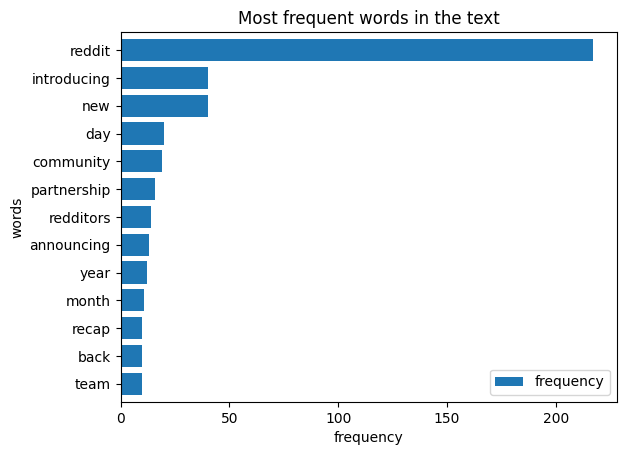

In [107]:
ax = frecuencias_df.head(15).plot(kind='barh', width=0.80)
ax.invert_yaxis()
ax.set(xlabel='frequency',ylabel='words', title='Most frequent words in the text')

In [120]:
import matplotlib.pyplot as plt
%matplotlib inline

Longitud de palabras por cada anuncio

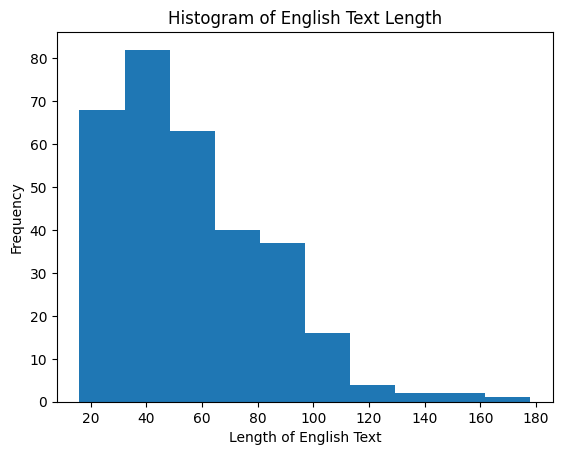

In [122]:
en['English'].str.len().plot.hist()
plt.xlabel('Length of English Text')
plt.ylabel('Frequency')
plt.title('Histogram of English Text Length')
plt.show()

Numero de Palabras por anuncio

<Axes: >

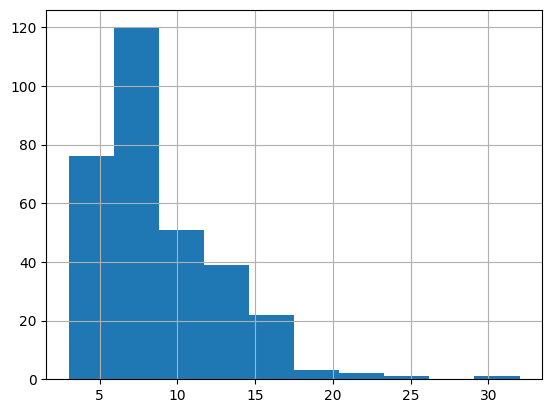

In [124]:
en['English'].str.split().apply(lambda x: len(x)).hist()

Longitud de cada palabra por anuncio

<Axes: >

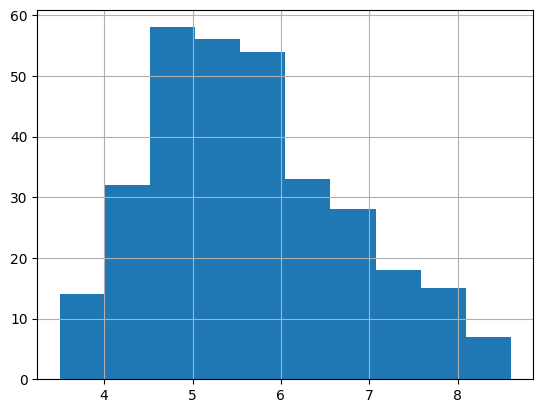

In [125]:
en['English'].str.split().apply(lambda x: [len(palabra) for palabra in x ]).map (lambda x: np.mean(x)).hist()

In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
dataset = [" ".join(palabra.split()) for palabra in en['English']]
print(dataset)

['A Faster, Conversation-First Approach to Feeds in Reddit’s Mobile Apps', 'Expanding our Shopping Ecosystem: Introducing Dynamic Product Ads', 'Building on Our Partnership With Cision', 'Reddit is Now a Publicly Traded Company on the New York Stock Exchange', 'Keeping Our Platform Safe', 'Advertise Like a Redditor With Our All-New, Completely Unique Ad Format: Free-Form Ads', 'Introducing the New Toolkit for Business Growth: Reddit Pro is Here', 'Reddit Files Registration Statement for Proposed Initial Public Offering', 'Expanding our Partnership with Google', 'Leading with Community: Reddit Joins Pledge 1%', 'How Reddit Supports Civic Engagement and Election Integrity in 2024', 'Driving advertiser performance through advanced measurement solutions: announcing our first Conversions API partner, Tealium', 'The Key to Unlocking Relevant Audiences? Join Us at CES 2024 To Find Out How', 'Wishing Redditors Joy, Cheer, and Bananas This Recap Season', 'Turning Conversations Into Customers: A

In [37]:
# definición del Vector tf-idf:
tfIdfVectorizer=TfidfVectorizer(use_idf=True)

# "entrenamiento" de tf-idf:
tfIdf = tfIdfVectorizer.fit_transform(dataset)

TF-IDF proporciona una forma de evaluar la importancia relativa de un término en un documento dentro de un conjunto de documentos. Se utiliza ampliamente en procesamiento de lenguaje natural (NLP) y recuperación de información para representar y buscar documentos basados en las palabras que contienen.

In [38]:
tfIdf[0]

<1x977 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [39]:
# extracción de las palabras y los valores de tf-idf:
df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names_out(), columns=["tf-idf"])
# ordenamiento de las palabras obtenidas:
df = df.sort_values('tf-idf', ascending=False)
# impresión de los datos tf-idf:
print (df.head(25))

                tf-idf
approach      0.403643
faster        0.403643
feeds         0.403643
mobile        0.357494
apps          0.357494
conversation  0.330498
first         0.253754
in            0.204189
to            0.178313
reddit        0.092219
placement     0.000000
plans         0.000000
place         0.000000
photoshop     0.000000
pledge        0.000000
peshkov       0.000000
podcast       0.000000
politics      0.000000
platform      0.000000
000           0.000000
poll          0.000000
polls         0.000000
period        0.000000
porter        0.000000
post          0.000000


In [40]:
def crea_corpus(texto):
    corpus=[]
    texto=texto.values.tolist()
    corpus=[palabra.lower() for oracion in texto for palabra in oracion ]
    corpus=quita_stopword(corpus)
    return corpus

In [41]:
corpus1=crea_corpus(en['English'].map(lambda x: tokenize(x)))

In [42]:
import seaborn as sns

In [43]:
def palabras_principales(corpus, stopwords):
    counter=Counter(corpus)
    mas_comunes=counter.most_common()

    palabras, repeticiones= [], []
    for palabra,repeticion in mas_comunes[:25]:
        if (palabra not in stopwords):
            palabras.append(palabra)
            repeticiones.append(repeticion)
    sns.barplot(x=repeticiones,y=palabras)

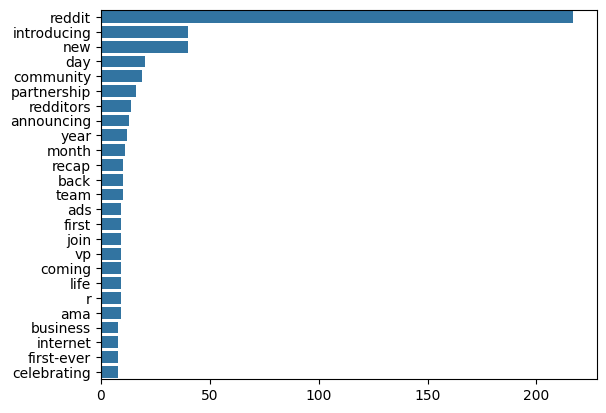

In [44]:
palabras_principales(corpus1,stopwords)

In [45]:
from wordcloud import WordCloud

In [46]:
def nube_palabras(corpus, stopwords, color):
 stopwords = set(stopwords)
 wordcloud = WordCloud(
 background_color=color,
 stopwords=stopwords,
 max_words=100,
 max_font_size=45,
 scale=3,
 random_state=1)
 
 wordcloud=wordcloud.generate(str(corpus))
 fig = plt.figure(1, figsize=(15, 15))
 plt.imshow(wordcloud)
 plt.show() 

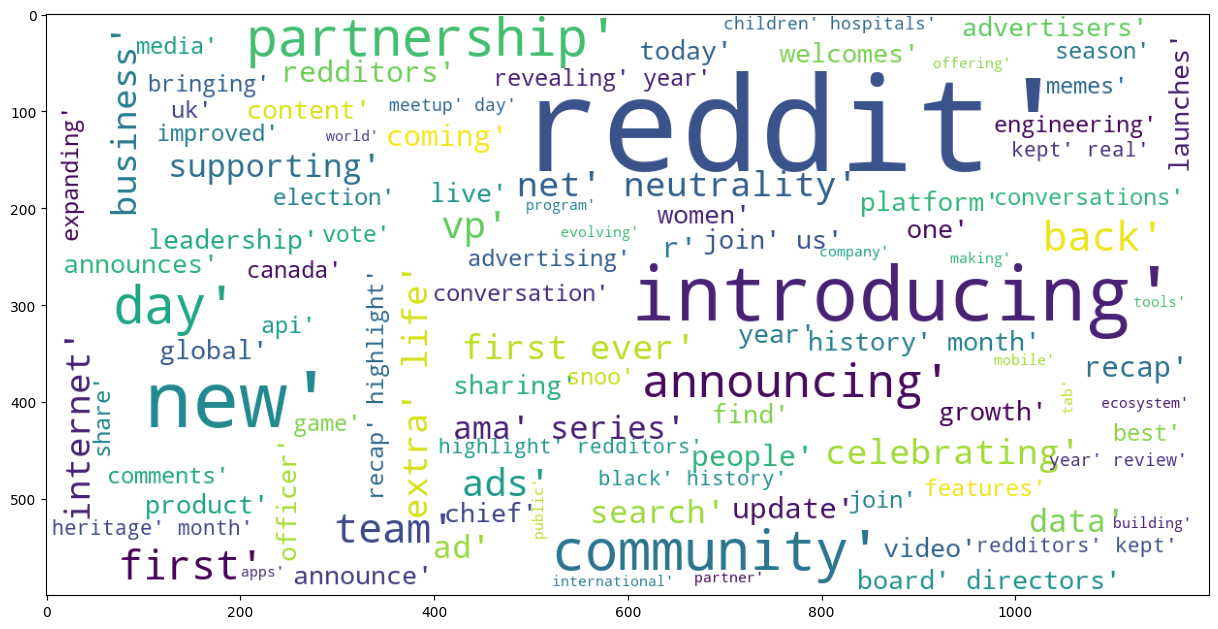

In [47]:
nube_palabras(corpus1, stopwords, 'white') 

# Lemmatization

La lematización es un proceso lingüístico que consiste en reducir las palabras a su forma base o forma canónica, conocida como lema. El lema es la forma de la palabra que se encuentra en un diccionario y que representa el significado básico o fundamental de esa palabra.

Por ejemplo, en inglés, la lematización transformaría las palabras "running", "runs" y "ran" a su lema común "run". En español, transformaría palabras como "corriendo", "corre" y "corrió" a su lema "correr".

In [48]:
import spacy

In [49]:
nlp=spacy.load('en_core_web_sm')

In [50]:
texto=en['English'].iloc[0]

In [51]:
texto

'A Faster, Conversation-First Approach to Feeds in Reddit’s Mobile Apps'

In [52]:
lista_tokens_lemmas=[]
for i,_ in enumerate(en['English']):
    texto=en['English'].iloc[i]
    doc=nlp(texto)
    for token in doc:
        if token.is_punct or token.is_stop or token.is_space:
            continue
        lista_tokens_lemmas.append([token.lower_, token.lemma_.lower()])

    

In [53]:
lista_tokens_lemmas_df=pd.DataFrame(lista_tokens_lemmas,columns=['Token','Lemma'])
lista_tokens_lemmas_df

,Token,Lemma
0,faster,fast
1,conversation,conversation
2,approach,approach
3,feeds,feeds
4,reddit,reddit
...,...,...
1923,2,2
1924,promote,promote
1925,ideas,idea
1926,protect,protect


In [54]:
cuenta=lista_tokens_lemmas_df.groupby('Token')['Token'].count()
cuenta.sort_values(ascending=False, inplace=True)
cuenta.head(5)



Token
reddit         218
new             45
introducing     40
day             20
community       19
Name: Token, dtype: int64

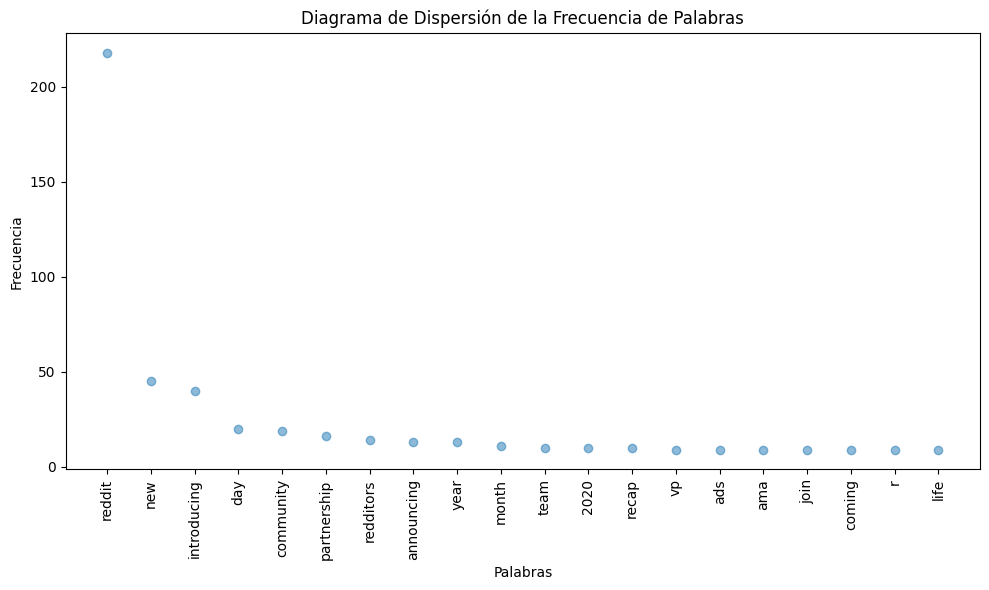

In [55]:
count=cuenta.head(20)
palabras = count.index
conteos = count.values

plt.figure(figsize=(10, 6))
plt.scatter(range(len(palabras)), conteos, alpha=0.5)
plt.title('Diagrama de Dispersión de la Frecuencia de Palabras')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(range(len(palabras)), palabras, rotation=90)
plt.tight_layout()
plt.show()

In [56]:
agrupado=lista_tokens_lemmas_df.groupby('Lemma')['Lemma'].count()
agrupado.sort_values(ascending=False, inplace=True)
agrupado.head(5)

Lemma
reddit       218
new           45
introduce     41
announce      21
day           20
Name: Lemma, dtype: int64

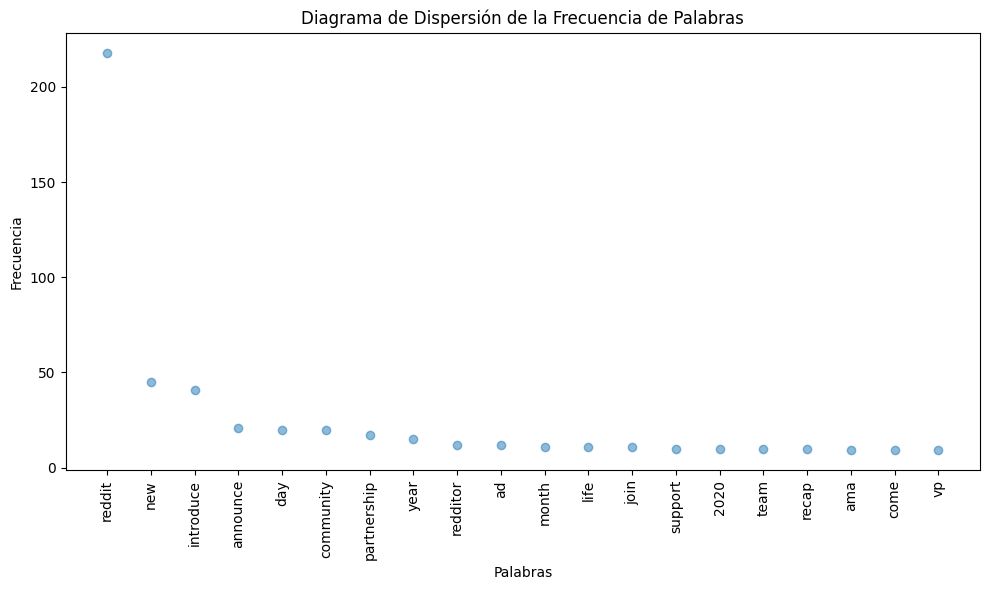

In [57]:
count=agrupado.head(20)
palabras = count.index
conteos = count.values

plt.figure(figsize=(10, 6))
plt.scatter(range(len(palabras)), conteos, alpha=0.5)
plt.title('Diagrama de Dispersión de la Frecuencia de Palabras')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(range(len(palabras)), palabras, rotation=90)
plt.tight_layout()
plt.show()

# 

# N-grmas Distributions

Los n-gramas son secuencias contiguas de n elementos de una cadena de texto, donde los elementos pueden ser letras, palabras o caracteres. En el contexto del procesamiento del lenguaje natural (NLP), los n-gramas se utilizan para capturar la estructura y la semántica de un texto mediante la extracción de secuencias de palabras o caracteres de longitud n.

Por ejemplo:

Un 1-grama (o unigrama) es una sola palabra.

Un 2-grama (o bigrama) es una secuencia de dos palabras consecutivas.

Un 3-grama (o trigrama) es una secuencia de tres palabras consecutivas.

Y así sucesivamente.

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
def calculaNGrams(corpus, n=None):
    vector_grams = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bolsa_de_palabras = vector_grams.transform(corpus)
    sumatoria_palabras = bolsa_de_palabras.sum(axis=0)
    frecuencias_palabras = [(palabra, sumatoria_palabras[0, indice])
        for palabra, indice in vector_grams.vocabulary_.items()]
    frecuencias_palabras =sorted(frecuencias_palabras, key = lambda x: x[1], reverse=True)
    x,y=map(list,zip(*frecuencias_palabras[:10]))
    sns.barplot(x=y,y=x)

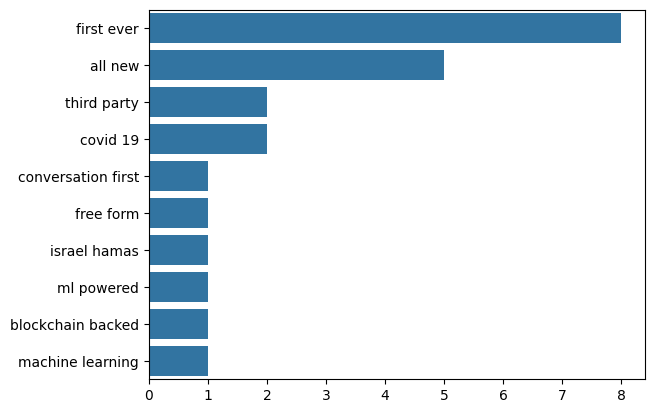

In [60]:
calculaNGrams(corpus1, n=2)

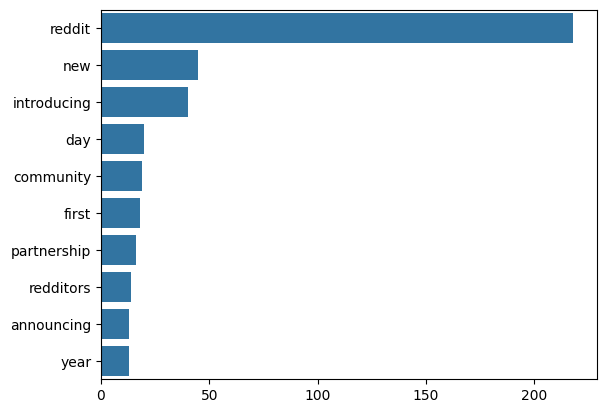

In [61]:
calculaNGrams(corpus1, n=1)

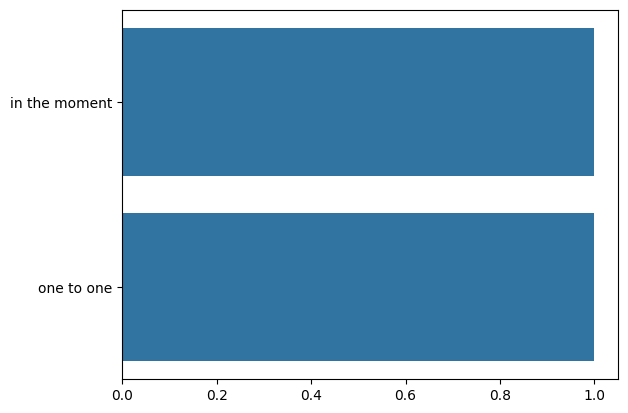

In [62]:
calculaNGrams(corpus1, n=3)

# Extraction of main features

## Sentimental Analysis (pysentimiento vs vader)

# pysentimiento

In [63]:
from pysentimiento import create_analyzer
analyzer = create_analyzer(task="sentiment", lang="en")


c:\Users\habar\anaconda3\envs\ML\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [64]:
for indice, fila in en.iterrows():
    texto = fila['English']
    sentimiento = analyzer.predict(texto)

In [65]:
sentimiento

AnalyzerOutput(output=POS, probas={POS: 0.687, NEU: 0.311, NEG: 0.003})

Analizar sentimientos de cada fila

In [66]:
datos=en['English'].tolist()

In [67]:
datos_sent=analyzer.predict(datos)

Map: 100%|██████████| 315/315 [00:00<00:00, 2566.03 examples/s]


In [68]:
def obtenProbabilidades(data_en, datos_sent):
  negativos = []
  neutros = []
  positivos =[]
  for probabilidad in datos_sent:
    negativos.append(probabilidad.probas['NEG'])
    neutros.append(probabilidad.probas['NEU'])
    positivos.append(probabilidad.probas['POS'])
  probabilidades = {'negativos': negativos, 'neutros': neutros, 'positivos':positivos}
  probabilidades = pd.DataFrame.from_dict(probabilidades)
  data_en_df=pd.DataFrame(data_en, columns=['Announcement'])
  return pd.concat([data_en_df, probabilidades], axis=1)

In [69]:
prob = obtenProbabilidades(datos, datos_sent)

In [70]:
prob

,Announcement,negativos,neutros,positivos
0,"A Faster, Conversation-First Approach to Feeds...",0.003282,0.648334,0.348384
1,Expanding our Shopping Ecosystem: Introducing ...,0.002054,0.293818,0.704129
2,Building on Our Partnership With Cision,0.002290,0.411691,0.586019
3,Reddit is Now a Publicly Traded Company on the...,0.004351,0.890637,0.105012
4,Keeping Our Platform Safe,0.003974,0.269432,0.726594
...,...,...,...,...
310,"Highlights from CEO Steve Huffman's ""State of ...",0.002636,0.918258,0.079106
311,The Rise and Rise of Wholesome Memes,0.034426,0.909638,0.055936
312,Spoiler Tags for Posts,0.082565,0.906828,0.010607
313,Redditors' Questions Return to A&E on Leah Rem...,0.006581,0.976096,0.017322


In [71]:
print(prob['negativos'].mean())
print(prob['neutros'].mean())
print(prob['positivos'].mean())

0.01508543070937906
0.6324936426333374
0.35242092429201993


# vader

In [270]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer



In [273]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\habar\AppData\Roaming\nltk_data...


True

In [295]:

sia = SentimentIntensityAnalyzer()
for indice, fila in en.iterrows():
    texto = fila['English']
    vader = sia.polarity_scores(texto)

    


In [341]:
vader

{'neg': 0.0, 'neu': 0.278, 'pos': 0.722, 'compound': 0.6369}

In [297]:
sentimiento

AnalyzerOutput(output=POS, probas={POS: 0.687, NEU: 0.311, NEG: 0.003})

# Classification proposed

This endpoint will receive as input parameters of text preprocessing:

- Construction model

- End Date (date time)

- Taring model

- Calculation of grammatical probabilities

In [72]:
en_sentimiento=en.copy()

In [73]:
en_sentimiento

,Announcement,share-link,Date,Time,UTC,time_zone,Language,English,stopwords,frequency
0,"A Faster, Conversation-First Approach to Feeds...","['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-04-24,12:50:00,04:00,Hora Estándar del Atlántico,en,"A Faster, Conversation-First Approach to Feeds...","[faster, conversation-first, approach, feeds, ...",7
1,Expanding our Shopping Ecosystem: Introducing ...,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-04-24,08:00:00,04:00,Hora Estándar del Atlántico,en,Expanding our Shopping Ecosystem: Introducing ...,"[expanding, shopping, ecosystem, introducing, ...",7
2,Building on Our Partnership With Cision,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-03-27,13:00:00,04:00,Hora Estándar del Atlántico,en,Building on Our Partnership With Cision,"[building, partnership, cision]",3
3,Reddit is Now a Publicly Traded Company on the...,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-03-21,13:45:00,04:00,Hora Estándar del Atlántico,en,Reddit is Now a Publicly Traded Company on the...,"[reddit, publicly, traded, company, new, york,...",8
4,Keeping Our Platform Safe,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-03-15,10:40:00,04:00,Hora Estándar del Atlántico,en,Keeping Our Platform Safe,"[keeping, platform, safe]",3
...,...,...,...,...,...,...,...,...,...,...
332,"Highlights from CEO Steve Huffman's ""State of ...","['facebook', 'twitter', 'pinterest', 'tumblr',...",2017-01-27,00:00:00,05:00,Hora Estándar del Este,en,"Highlights from CEO Steve Huffman's ""State of ...","[highlights, ceo, steve, huffman, state, union...",7
333,The Rise and Rise of Wholesome Memes,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2017-01-23,00:00:00,05:00,Hora Estándar del Este,en,The Rise and Rise of Wholesome Memes,"[rise, rise, wholesome, memes]",4
334,Spoiler Tags for Posts,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2017-01-19,00:00:00,05:00,Hora Estándar del Este,en,Spoiler Tags for Posts,"[spoiler, tags, posts]",3
335,Redditors' Questions Return to A&E on Leah Rem...,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2017-01-18,00:00:00,05:00,Hora Estándar del Este,en,Redditors' Questions Return to A&E on Leah Rem...,"[redditors, questions, return, e, leah, remini...",9


In [74]:
sentimientos=[]
for i in range(len(prob)):
    neg=prob.loc[i,'negativos']
    neu=prob.loc[i,'neutros']
    pos=prob.loc[i,'positivos']
    variable=[('negativos',neg),('neutros',neu),('positivos',pos)]
    sentimiento,_=max(variable,key=lambda x: x[1])
    sentimientos.append(sentimiento)



In [75]:
en_sentimiento['Sentimientos']=sentimientos

In [76]:
en_sentimiento

,Announcement,share-link,Date,Time,UTC,time_zone,Language,English,stopwords,frequency,Sentimientos
0,"A Faster, Conversation-First Approach to Feeds...","['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-04-24,12:50:00,04:00,Hora Estándar del Atlántico,en,"A Faster, Conversation-First Approach to Feeds...","[faster, conversation-first, approach, feeds, ...",7,neutros
1,Expanding our Shopping Ecosystem: Introducing ...,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-04-24,08:00:00,04:00,Hora Estándar del Atlántico,en,Expanding our Shopping Ecosystem: Introducing ...,"[expanding, shopping, ecosystem, introducing, ...",7,positivos
2,Building on Our Partnership With Cision,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-03-27,13:00:00,04:00,Hora Estándar del Atlántico,en,Building on Our Partnership With Cision,"[building, partnership, cision]",3,positivos
3,Reddit is Now a Publicly Traded Company on the...,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-03-21,13:45:00,04:00,Hora Estándar del Atlántico,en,Reddit is Now a Publicly Traded Company on the...,"[reddit, publicly, traded, company, new, york,...",8,neutros
4,Keeping Our Platform Safe,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-03-15,10:40:00,04:00,Hora Estándar del Atlántico,en,Keeping Our Platform Safe,"[keeping, platform, safe]",3,positivos
...,...,...,...,...,...,...,...,...,...,...,...
332,"Highlights from CEO Steve Huffman's ""State of ...","['facebook', 'twitter', 'pinterest', 'tumblr',...",2017-01-27,00:00:00,05:00,Hora Estándar del Este,en,"Highlights from CEO Steve Huffman's ""State of ...","[highlights, ceo, steve, huffman, state, union...",7,neutros
333,The Rise and Rise of Wholesome Memes,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2017-01-23,00:00:00,05:00,Hora Estándar del Este,en,The Rise and Rise of Wholesome Memes,"[rise, rise, wholesome, memes]",4,neutros
334,Spoiler Tags for Posts,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2017-01-19,00:00:00,05:00,Hora Estándar del Este,en,Spoiler Tags for Posts,"[spoiler, tags, posts]",3,neutros
335,Redditors' Questions Return to A&E on Leah Rem...,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2017-01-18,00:00:00,05:00,Hora Estándar del Este,en,Redditors' Questions Return to A&E on Leah Rem...,"[redditors, questions, return, e, leah, remini...",9,neutros


In [77]:
en_sentimiento['Sent_cuanti']=sentimientos

In [78]:
en_sentimiento.head(2)

,Announcement,share-link,Date,Time,UTC,time_zone,Language,English,stopwords,frequency,Sentimientos,Sent_cuanti
0,"A Faster, Conversation-First Approach to Feeds...","['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-04-24,12:50:00,04:00,Hora Estándar del Atlántico,en,"A Faster, Conversation-First Approach to Feeds...","[faster, conversation-first, approach, feeds, ...",7,neutros,neutros
1,Expanding our Shopping Ecosystem: Introducing ...,"['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-04-24,08:00:00,04:00,Hora Estándar del Atlántico,en,Expanding our Shopping Ecosystem: Introducing ...,"[expanding, shopping, ecosystem, introducing, ...",7,positivos,positivos


In [79]:
# clasificar datos cualitativos a cuantitativos
en_sentimiento['Sent_cuanti'] = np.where(en_sentimiento['Sent_cuanti'].str.contains('neutros'), 1,
                                np.where(en_sentimiento['Sent_cuanti'].str.contains('positivos'), 2,
                                np.where(en_sentimiento['Sent_cuanti'].str.contains('negativos'), 3, np.nan)))

In [80]:
en_sentimiento.head(1)

,Announcement,share-link,Date,Time,UTC,time_zone,Language,English,stopwords,frequency,Sentimientos,Sent_cuanti
0,"A Faster, Conversation-First Approach to Feeds...","['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-04-24,12:50:00,04:00,Hora Estándar del Atlántico,en,"A Faster, Conversation-First Approach to Feeds...","[faster, conversation-first, approach, feeds, ...",7,neutros,1.0


In [81]:
en_sentimiento['Sent_cuanti']=en_sentimiento['Sent_cuanti'].astype(int)

In [82]:
en_sentimiento.head(1)

,Announcement,share-link,Date,Time,UTC,time_zone,Language,English,stopwords,frequency,Sentimientos,Sent_cuanti
0,"A Faster, Conversation-First Approach to Feeds...","['facebook', 'twitter', 'pinterest', 'tumblr',...",2024-04-24,12:50:00,04:00,Hora Estándar del Atlántico,en,"A Faster, Conversation-First Approach to Feeds...","[faster, conversation-first, approach, feeds, ...",7,neutros,1


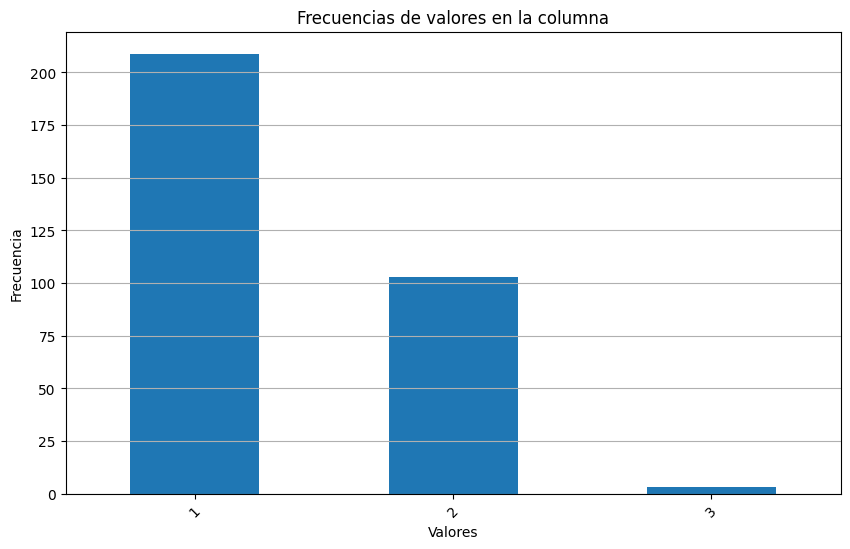

In [83]:

frecuencias = en_sentimiento['Sent_cuanti'].value_counts()

plt.figure(figsize=(10, 6))
frecuencias.plot(kind='bar')
plt.title('Frecuencias de valores en la columna')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  
plt.grid(axis='y')  

In [85]:
en_sentimiento.to_csv('Reddit-data-final.csv', index=False)

In [84]:
dataset = [" ".join(palabra.split()) for palabra in en_sentimiento['English']]
print(dataset)

['A Faster, Conversation-First Approach to Feeds in Reddit’s Mobile Apps', 'Expanding our Shopping Ecosystem: Introducing Dynamic Product Ads', 'Building on Our Partnership With Cision', 'Reddit is Now a Publicly Traded Company on the New York Stock Exchange', 'Keeping Our Platform Safe', 'Advertise Like a Redditor With Our All-New, Completely Unique Ad Format: Free-Form Ads', 'Introducing the New Toolkit for Business Growth: Reddit Pro is Here', 'Reddit Files Registration Statement for Proposed Initial Public Offering', 'Expanding our Partnership with Google', 'Leading with Community: Reddit Joins Pledge 1%', 'How Reddit Supports Civic Engagement and Election Integrity in 2024', 'Driving advertiser performance through advanced measurement solutions: announcing our first Conversions API partner, Tealium', 'The Key to Unlocking Relevant Audiences? Join Us at CES 2024 To Find Out How', 'Wishing Redditors Joy, Cheer, and Bananas This Recap Season', 'Turning Conversations Into Customers: A

SVC

In [509]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report


tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X = tfidf_vectorizer.fit_transform(dataset)#en_sentimiento['English']
y = en_sentimiento['Sent_cuanti']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)



SVC(kernel='linear')

In [484]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix

In [497]:

ytest_predict_svm_model=svm_model.predict(X_test)
ytrain_predict_svm_model=svm_model.predict(X_train)
precision_svm_model=precision_score(y_test,ytest_predict_svm_model,average='macro')
recall_svm_model=recall_score(y_test,ytest_predict_svm_model,average='macro') 
F1_svm_model=f1_score(y_test,ytest_predict_svm_model,average='macro')

print('Accuracy Test:',accuracy_score(y_test,ytest_predict_svm_model))
print('Accuracy Train:',accuracy_score(y_train,ytrain_predict_svm_model))
print("Precision Support Vector Classification:", precision_svm_model)
print("Recall Support Vector Classification:", recall_svm_model)
print("F1_Score Support Vector Classification:", F1_svm_model)

Accuracy Test: 0.7777777777777778
Accuracy Train: 0.9682539682539683
Precision Support Vector Classification: 0.7273936170212766
Recall Support Vector Classification: 0.7111111111111111
F1_Score Support Vector Classification: 0.7180306905370843


Nive bayes

In [521]:
X = tfidf_vectorizer.fit_transform(dataset)#en_sentimiento['English']
y = en_sentimiento['Sent_cuanti']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_nv=GaussianNB()
model_nv.fit(X_train.toarray(), y_train)

ytest_predict_nb=model_nv.predict(X_test.toarray())
ytrain_predict_nb=model_nv.predict(X_train.toarray())
precision_model_nv=precision_score(y_test,ytest_predict_nb,average='macro')
recall_model_nv=recall_score(y_test,ytest_predict_nb,average='macro') 
F1_model_nvl=f1_score(y_test,ytest_predict_nb,average='macro')

print('Accuracy Test:',accuracy_score(y_test,ytest_predict_nb))
print('Accuracy Train:',accuracy_score(y_train,ytrain_predict_nb))
print("Precision NB:", precision_model_nv)
print("Recall Support NB:", recall_model_nv)
print("F1_Score Support NB:", F1_model_nvl)


Accuracy Test: 0.6031746031746031
Accuracy Train: 0.9841269841269841
Precision NB: 0.5867139959432048
Recall Support NB: 0.6055555555555556
F1_Score Support NB: 0.5758147050902236


Random Forest


In [516]:
from sklearn.ensemble import RandomForestClassifier

In [518]:
X = tfidf_vectorizer.fit_transform(dataset)#en_sentimiento['English']
y = en_sentimiento['Sent_cuanti']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=150, random_state=42)
rf.fit(X_train,y_train)
ytest_predict_rf=rf.predict(X_test)
ytrain_predict_rf=rf.predict(X_train)
precision_rf=precision_score(y_test,ytest_predict_rf,average='macro')
recall_rf=recall_score(y_test,ytest_predict_rf,average='macro') #sensibildiad
F1_rf=f1_score(y_test,ytest_predict_rf,average='macro')

print('Accuracy Test:',accuracy_score(y_test,ytest_predict_rf))
print('Accuracy Train:',accuracy_score(y_train,ytrain_predict_rf))
print("Precision Random Forest:", precision_rf)
print("Recall Random Forest:", recall_rf)
print("F1_Score Random Forest:", F1_rf)

Accuracy Test: 0.7936507936507936
Accuracy Train: 1.0
Precision Random Forest: 0.7674825174825175
Recall Random Forest: 0.6888888888888889
F1_Score Random Forest: 0.7088517596871667


K-Nearest Neighbors (KNN)

In [519]:
from sklearn.neighbors import KNeighborsClassifier

In [520]:
X = tfidf_vectorizer.fit_transform(dataset)#en_sentimiento['English']
y = en_sentimiento['Sent_cuanti']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_k = KNeighborsClassifier(n_neighbors=15, weights='distance')
knn_k.fit(X_train,y_train)
ytest_predict_knn_k=rf.predict(X_test)
ytrain_predict_knn_k=rf.predict(X_train)
precision_knn_k=precision_score(y_test,ytest_predict_knn_k,average='macro')
recall_knn_k=recall_score(y_test,ytest_predict_knn_k,average='macro') #sensibildiad
F1_knn_k=f1_score(y_test,ytest_predict_knn_k,average='macro')

print('Accuracy Test:',accuracy_score(y_test,ytest_predict_knn_k))
print('Accuracy Train:',accuracy_score(y_train,ytrain_predict_knn_k))
print("Precision knn_k:", precision_knn_k)
print("Recall knn_k:", recall_knn_k)
print("F1_Score knn_k:", F1_knn_k)

Accuracy Test: 0.7936507936507936
Accuracy Train: 1.0
Precision knn_k: 0.7674825174825175
Recall knn_k: 0.6888888888888889
F1_Score knn_k: 0.7088517596871667
